In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#資料生成

from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#呼叫資料內的Label

iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#Features
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
x = iris['data'][:, 0].reshape(-1,1)   #Sepal length
y = (iris['target'] == 0).astype(np.int64)   #Setosa，將T,F轉成整數

In [10]:
x[:3]

array([[5.1],
       [4.9],
       [4.7]])

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
#使用LogisticRegression()

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver='lbfgs', C=1, random_state=1)
logReg.fit(x,y)
logReg.intercept_, logReg.coef_

(array([18.5455613]), array([[-3.45772499]]))

In [15]:
logReg.score(x,y)

0.8933333333333333

In [17]:
xNew = [[5],[6.5]]

logReg.predict(xNew)

array([1, 0])

In [18]:
logReg.predict_proba(xNew)

array([[0.22150173, 0.77849827],
       [0.98072817, 0.01927183]])

In [22]:
#使用SGDClassifier()

from sklearn.linear_model import SGDClassifier

sgdClf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, random_state=1)

sgdClf.fit(x,y)
sgdClf.intercept_, sgdClf.coef_

(array([321.68580859]), array([[-61.90239437]]))

In [23]:
sgdClf.score(x,y)

0.8733333333333333

In [24]:
xNew = [[5],[6.5]]
sgdClf.predict(xNew)

array([1, 0])

In [25]:
sgdClf.predict_proba(xNew)

array([[5.16377895e-06, 9.99994836e-01],
       [1.00000000e+00, 9.14592585e-36]])

In [26]:
#Decision Boundary
# h=0, i.e. h = b+w1x1 =0 => x1=-b/w1

decisionBoundary = -logReg.intercept_ / logReg.coef_
decisionBoundary

array([[5.36351542]])

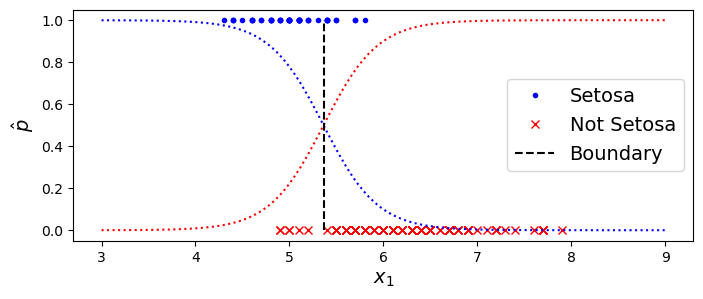

In [28]:
#Plot of the decision boundary

xs = np.linspace(3, 9, 100).reshape(-1, 1)
yProba = logReg.predict_proba(xs)

plt.figure(figsize=(8, 3))
plt.plot(x[y==1], y[y==1], 'b.', label='Setosa')
plt.plot(x[y==0], y[y==0], 'rx', label='Not Setosa')

plt.plot(xs, yProba[:, 0],'r:')
plt.plot(xs, yProba[:, 1],'b:')

plt.plot([decisionBoundary[0], decisionBoundary[0]],[0, 1], 'k--', label='Boundary')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$\hat p$', fontsize=14)
plt.legend(loc='center right', fontsize=14)

plt.show()

In [29]:
x = iris['data'][:, :2]   #Sepal length,Sepal width
y = (iris['target'] == 0).astype(np.int64)   #Setosa

In [30]:
x[:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
logReg = LogisticRegression(solver='lbfgs', C=1, random_state=42)
logReg.fit(x,y)
logReg.intercept_,logReg.coef_

(array([8.32330389]), array([[-3.38829757,  3.1645277 ]]))

In [34]:
logReg.score(x,y)

1.0

In [35]:
xNew = [[5.5,2.8],[4.5,3.25]]
logReg.predict(xNew)

array([0, 1])

In [36]:
logReg.predict_proba(xNew)

array([[0.81025304, 0.18974696],
       [0.03354717, 0.96645283]])

In [37]:
#Decision Boundary
#h = b+w1x1+w2x2 = 0 => x2=-(b+w1x1)/w2 =>(x1,x2), where x2=-(b+w1x1)/w2

x1Boundary = np.linspace(x.min(axis=0)[0]-0.05, x.max(axis=0)[0]+0.05,5)
x2Boundary = -(logReg.intercept_[0] + logReg.coef_[0][0] * x1Boundary) / logReg.coef_[0][1]

boundary = np.c_[x1Boundary, x2Boundary]
boundary

array([[4.25      , 1.92033737],
       [5.175     , 2.9107459 ],
       [6.1       , 3.90115444],
       [7.025     , 4.89156298],
       [7.95      , 5.88197152]])

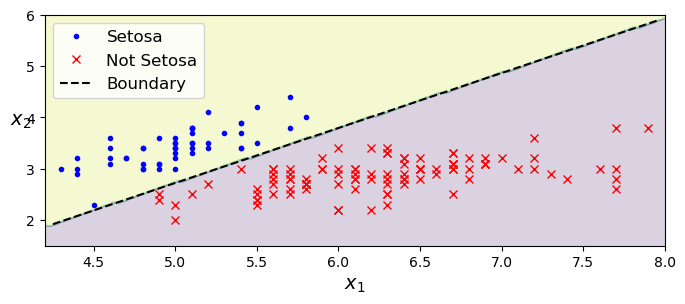

In [43]:
#Plot of the decision boundary

x1s = np.linspace(4.2, 8, 100).reshape(-1,1)
x2s = np.linspace(1.5, 6, 100).reshape(-1,1)

x1, x2 = np.meshgrid(x1s, x2s)
xNew = np.c_[x1.ravel(), x2.ravel()]
yPred = logReg.predict(xNew)

plt.figure(figsize=(8, 3))
plt.plot(x[y==1, 0], x[y==1, 1], 'b.', label='Setosa')
plt.plot(x[y==0, 0], x[y==0, 1], 'rx', label='Not Setosa')

zz = yPred.reshape(x1.shape)
plt.contourf(x1, x2, zz, alpha=0.2)
plt.plot(boundary[:, 0], boundary[:, 1], 'k--', label='Boundary')

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', rotation=0, fontsize=14)
plt.legend(loc='upper left', fontsize=12)

plt.show()